In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy

In [26]:
# DonnÃ©es simulÃ©es : prÃ©fÃ©rences utilisateur et caractÃ©ristiques des objets
users = ["Ameth", "Fatou", "Modou"]
items = ["Film1", "Film2", "Film3", "Film4"]

In [27]:
# Matrices de distribution (ProbabilitÃ©s des genres pour utilisateurs et objets)
PU = np.array([[0.6, 0.3, 0.1], [0.2, 0.7, 0.1],
              [0.1, 0.1, 0.8]])  # Utilisateurs
PO = np.array([[0.5, 0.3, 0.2], [0.1, 0.8, 0.1], [
              0.3, 0.2, 0.5], [0.2, 0.6, 0.2]])  # Objets

/home/mg4/miniconda3/envs/Mg4_IA/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.draw()
/tmp/ipykernel_34104/3882083370.py:20: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  plt.tight_layout()
/home/mg4/miniconda3/envs/Mg4_IA/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


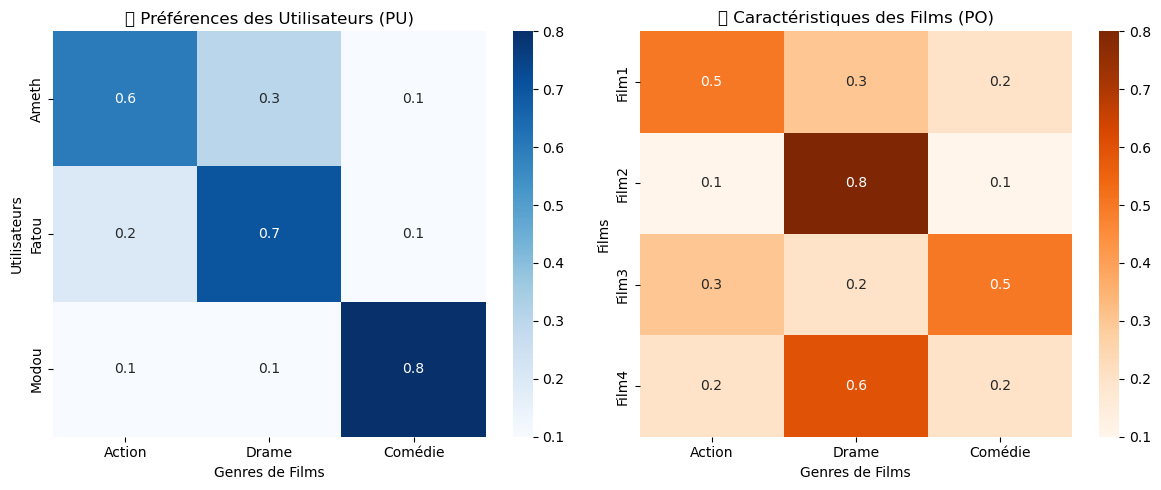

In [28]:

# DÃ©finition des labels pour les genres
genres = ["Action", "Drame", "ComÃ©die"]

# CrÃ©ation des heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ðŸ”¹ Heatmap des prÃ©fÃ©rences des utilisateurs (PU)
sns.heatmap(PU, annot=True, cmap="Blues", xticklabels=genres, yticklabels=users, ax=axes[0])
axes[0].set_title("ðŸ”¹ PrÃ©fÃ©rences des Utilisateurs (PU)")
axes[0].set_xlabel("Genres de Films")
axes[0].set_ylabel("Utilisateurs")

# ðŸ”¹ Heatmap des caractÃ©ristiques des films (PO)
sns.heatmap(PO, annot=True, cmap="Oranges", xticklabels=genres, yticklabels=items, ax=axes[1])
axes[1].set_title("ðŸ”¹ CaractÃ©ristiques des Films (PO)")
axes[1].set_xlabel("Genres de Films")
axes[1].set_ylabel("Films")

# Affichage du graphique
plt.tight_layout()
plt.show()


In [29]:
# Fonction pour calculer l'information mutuelle


def mutual_information(pu, po):
    pu = pu[:, np.newaxis]  # Transformer en matrice colonne (2D)
    po = po[np.newaxis, :]  # Transformer en matrice ligne (2D)

    joint_prob = pu * po  # Produit matriciel
    marginal_u = np.sum(joint_prob, axis=1, keepdims=True)
    marginal_o = np.sum(joint_prob, axis=0, keepdims=True)
    
    with np.errstate(divide='ignore', invalid='ignore'):
        mi_matrix = joint_prob * np.log(joint_prob / (marginal_u * marginal_o))
        mi_matrix = np.nan_to_num(mi_matrix)  # GÃ©rer les NaN
        
    return np.sum(mi_matrix)


In [ ]:

# Calcul de l'information mutuelle avec valeur absolue

mi_scores = np.abs(np.array([[mutual_information(PU[u], PO[o]) for o in range(len(items))] for u in range(len(users))]))



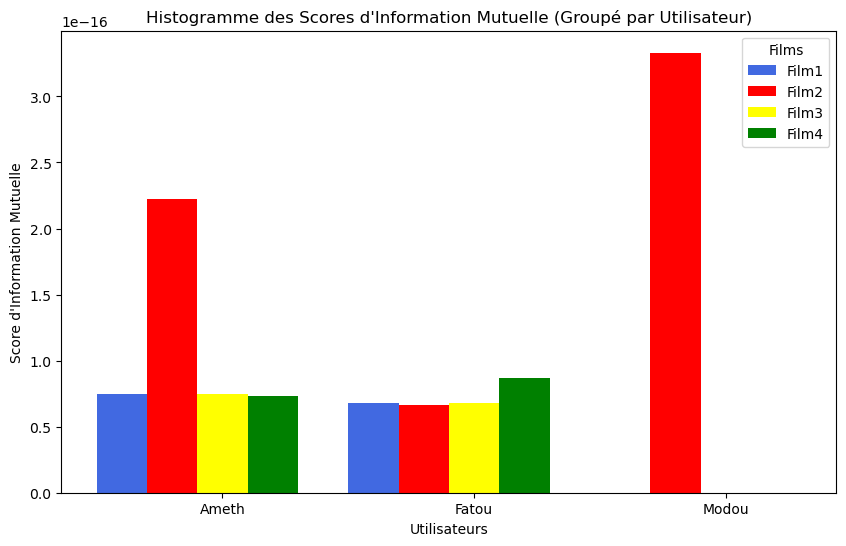

In [33]:


# DÃ©finition des couleurs pour chaque film
colors = ["royalblue", "red", "yellow", "green"]

# CrÃ©ation du graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Largeur des barres
bar_width = 0.2  
indices = np.arange(len(users))  # Positions pour les groupes

# CrÃ©ation des barres pour chaque film
for i, film in enumerate(items):
    scores = mi_scores[:, i]  # RÃ©cupÃ¨re les scores du film i pour tous les utilisateurs
    ax.bar(indices + i * bar_width, scores, bar_width, label=film, color=colors[i])

# Ajout des labels et titre
ax.set_xlabel("Utilisateurs")
ax.set_ylabel("Score d'Information Mutuelle")
ax.set_title("Histogramme des Scores d'Information Mutuelle (GroupÃ© par Utilisateur)")
ax.set_xticks(indices + bar_width * (len(items) / 2))
ax.set_xticklabels(users)  # Noms des utilisateurs sur l'axe X
ax.legend(title="Films")  # LÃ©gende avec les films

# Affichage du graphique
plt.show()


In [32]:
# GÃ©nÃ©ration des recommandations
recommendations = {users[u]: [items[i]
                              for i in np.argsort(-mi_scores[u])] for u in range(len(users))}

# Affichage des recommandations
for user, recs in recommendations.items():
    print(f"ðŸŽ¯ Recommandations pour {user} : {recs}")


ðŸŽ¯ Recommandations pour Ameth : ['Film2', 'Film3', 'Film1', 'Film4']
ðŸŽ¯ Recommandations pour Fatou : ['Film4', 'Film1', 'Film3', 'Film2']
ðŸŽ¯ Recommandations pour Modou : ['Film2', 'Film1', 'Film3', 'Film4']
